# Лабораторная работа №1

## Задание 1

In [179]:
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np

In [180]:
SAMPLE_RATE = 1000
T0 = -4
T1 = 4
T  = 2
A  = 2
N  = 10

In [181]:
def rect_func(x: float, A: float, w: float):
    return A * np.sign(np.sin(w * x))

In [183]:
def get_cyclic_freq(T: float):
    return 2 * np.pi / T

In [184]:
def func_x(func, A: float, T: float, start_point: float, end_point: float, sample_rate: int):

    x = np.linspace(start_point, end_point, num = sample_rate, endpoint = False)
    y = np.apply_along_axis(lambda val: func(val, A, get_cyclic_freq(T)), 0, x)

    return x, y

In [185]:
def approx_func_x(func, N: int, A: int, T: float, x: np.ndarray):
    
    w = get_cyclic_freq(T)
    a0 = 2 / T * integrate.quad(func, 0, T, args = (A, w))[0]
    an = lambda n: 2 / T * integrate.quad(lambda val: func(val, A, w) * np.cos(n * w * val), 0, T)[0]
    bn = lambda n: 2 / T * integrate.quad(lambda val: func(val, A, w) * np.sin(n * w * val), 0, T)[0]

    a = []
    b = []

    def find_dot(t: float):

        res = a0 / 2

        for i in range(1, N):
            res += an(i) * np.cos(i * w * t) + bn(i) * np.sin(i * w * t)

            a.append(an(i))
            b.append(bn(i))

        return res

    return a,b, np.apply_along_axis(find_dot, 0, x)


In [186]:
def error_func(true_vals: np.ndarray, approx_vals: np.ndarray):
    return true_vals - approx_vals

[2.751015081356678e-16, -2.7755575615628914e-16, 5.665678184982885e-16, 9.992007221626409e-16, 3.336063234823187e-16, -1.286032692950211e-16, 5.937460308028727e-16, 2.3592239273284576e-16, -8.173660511959178e-16]
[2.5464790894703255, 1.838168589960133e-17, 0.8488263631567756, -1.6548576749155088e-16, 0.5092958178940649, 1.542288069499316e-16, 0.36378272706719034, -8.175704613831253e-16, 0.28294212105225836]


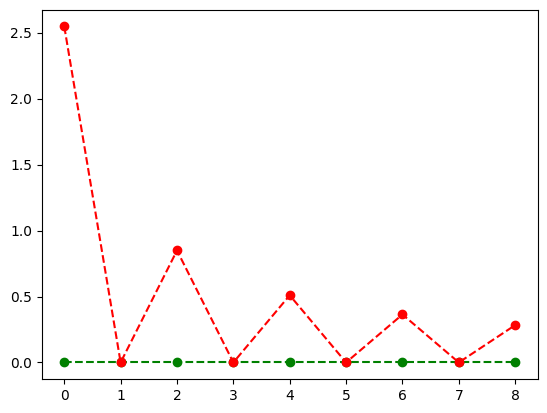

In [187]:
x, y0 = func_x(rect_func, A, T, T0, T1, SAMPLE_RATE)
a,b, y1 = approx_func_x(rect_func, N, A, T, x)
y2 = error_func(y0, y1)

print(a)
print(b)

plt.plot(a,'go--')
plt.plot(b,'ro--')
plt.show()

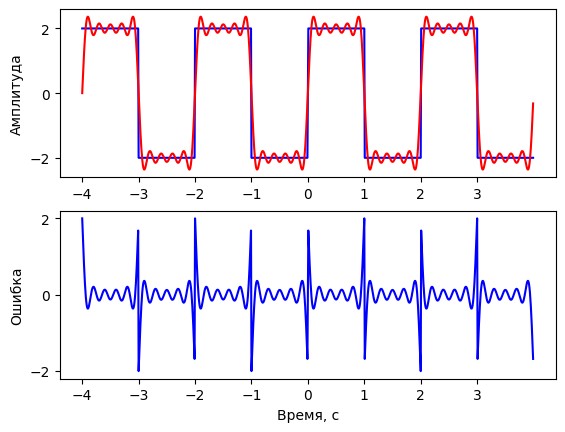

In [188]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(x, y0, color = 'blue')
axs[0].plot(x, y1, color = 'red')
axs[1].plot(x, y2, color = 'blue')

axs[0].set_ylabel('Амплитуда')
axs[1].set_ylabel('Ошибка')
axs[1].set_xlabel('Время, с')

axs[0].set_xticks(np.unique(np.int16(x)))
axs[0].set_yticks([-A, 0, A])
axs[1].set_xticks(np.unique(np.int16(x)))
axs[1].set_yticks([-A, 0, A])

plt.show()

## Задание 2

In [182]:
def cos_func(x: float, A: float, w: float):
    return A * np.cos(w * x)

In [189]:
SAMPLE_RATE = 1000
T0 = -10
T1 = 10
A  = 2
f  = 100
N  = 10

In [190]:
def get_period(f: float):
    return 1 / f

In [191]:
x, y0 = func_x(cos_func, A, get_period(f), T0, T1, SAMPLE_RATE)

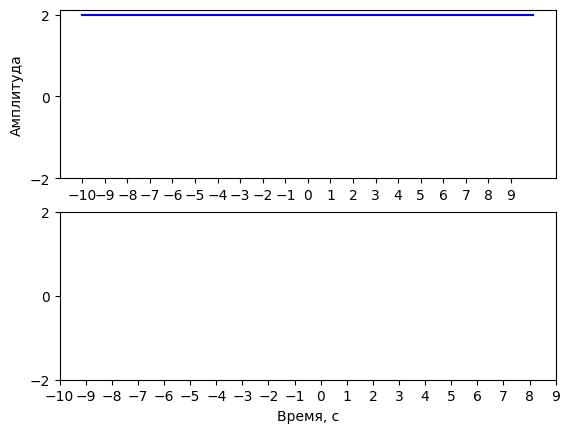

In [192]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(x, y0, color = 'blue')
# axs[0].plot(x, y1, color = 'orange')
# axs[1].plot(x, y2, color = 'blue')

axs[0].set_ylabel('Амплитуда')
# axs[1].set_ylabel('Ошибка')
axs[1].set_xlabel('Время, с')

axs[0].set_xticks(np.unique(np.int16(x)))
axs[0].set_yticks([-A, 0, A])
axs[1].set_xticks(np.unique(np.int16(x)))
axs[1].set_yticks([-A, 0, A])